In [20]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import matplotlib.pyplot as plt

In [36]:
R = 25

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
#arr1

In [37]:
ncols

51

In [38]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

arr1
#print(np.array_str(arr1, precision=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
print(np.max(arr1), np.min(arr1))

25.0 0.0


In [46]:
#Export
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_orig.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr1)
# gtiff.FlushCache()
gtiff = None

In [40]:
arr1[0][0]

arr2 = np.copy(arr1)

In [43]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n + 1
arr_k

array([[ 2.14664332,  2.21047951,  1.58809848, ...,  1.42080831,
         0.25433398,  0.25942444],
       [ 0.50315458,  1.93511051, -0.19894236, ..., -1.03510442,
         2.38575746,  2.16532102],
       [-0.8066518 , -0.12175812,  1.97549235, ..., -0.05697259,
        -1.34694481, -0.43176606],
       ...,
       [ 1.98454949,  1.04167053,  0.42092257, ...,  1.87095939,
         1.68229677,  0.48533251],
       [ 2.20563101,  0.87108246,  0.68059237, ...,  0.94287027,
         0.06314811,  2.56345759],
       [-0.01487405,  0.2655508 , -0.28491486, ...,  2.00604516,
         1.97803193,  0.05692111]])

In [49]:
print(np.max(arr1), np.min(arr1))
print(np.max(arr_n), np.min(arr_n))
print(np.max(arr_k), np.min(arr_k))

25.0 0.0
3.174822575166531 -4.03595355195934
29.005998729981425 -2.0957233632659213


In [12]:
#fig, ax = plt.subplots(1, 3)
#ax[0].contour(arr1)
#ax[1].contour(arr_n)
#ax[2].contour(arr_k)
#plt.show()

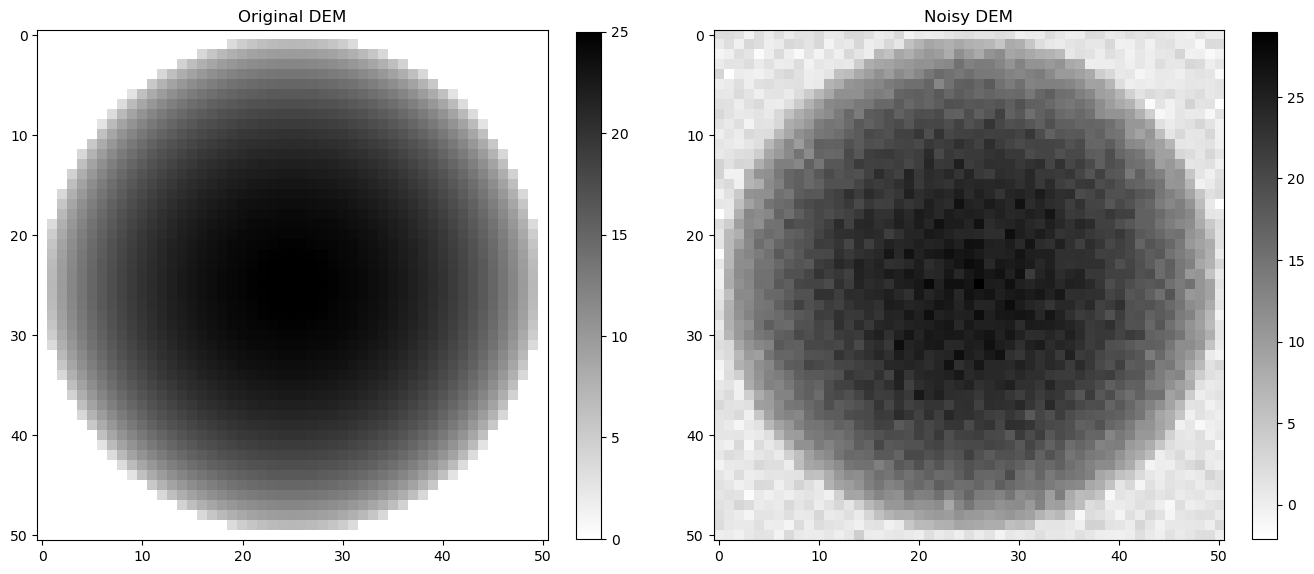

In [44]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(arr1, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM')
plt.imshow(arr_k, cmap='binary')
plt.colorbar(fraction=0.045)
plt.show()

In [34]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[ 0.05746899,  1.35286707,  0.2439917 , ...,  0.48246169,
         0.64343421, -1.31260525],
       [ 0.30561816, -0.79241479,  0.28407417, ...,  1.44489386,
         0.06042169, -1.08437333],
       [-0.07300404,  0.69752457,  0.07425733, ...,  1.03018273,
        -0.22695959,  0.54028919],
       ...,
       [-1.10277894,  1.54054728, -0.29478384, ...,  0.38281281,
         1.11868079,  0.24790642],
       [ 0.69922229, -0.48457958,  0.99101221, ...,  1.84097369,
         0.49181766,  0.75969852],
       [ 0.61380657, -0.21390033, -2.78685889, ..., -0.08549397,
        -0.05751069, -1.40516937]])

In [45]:
#Export
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_noisy_new.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_k)
# gtiff.FlushCache()
gtiff = None

In [44]:
#hemicylinder
R = 25

arr_c = np.zeros((int(3*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

#arr_c

In [45]:
np.max(arr_c)

25.0

In [46]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_cn = arr_c + arr_n
#arr_cn

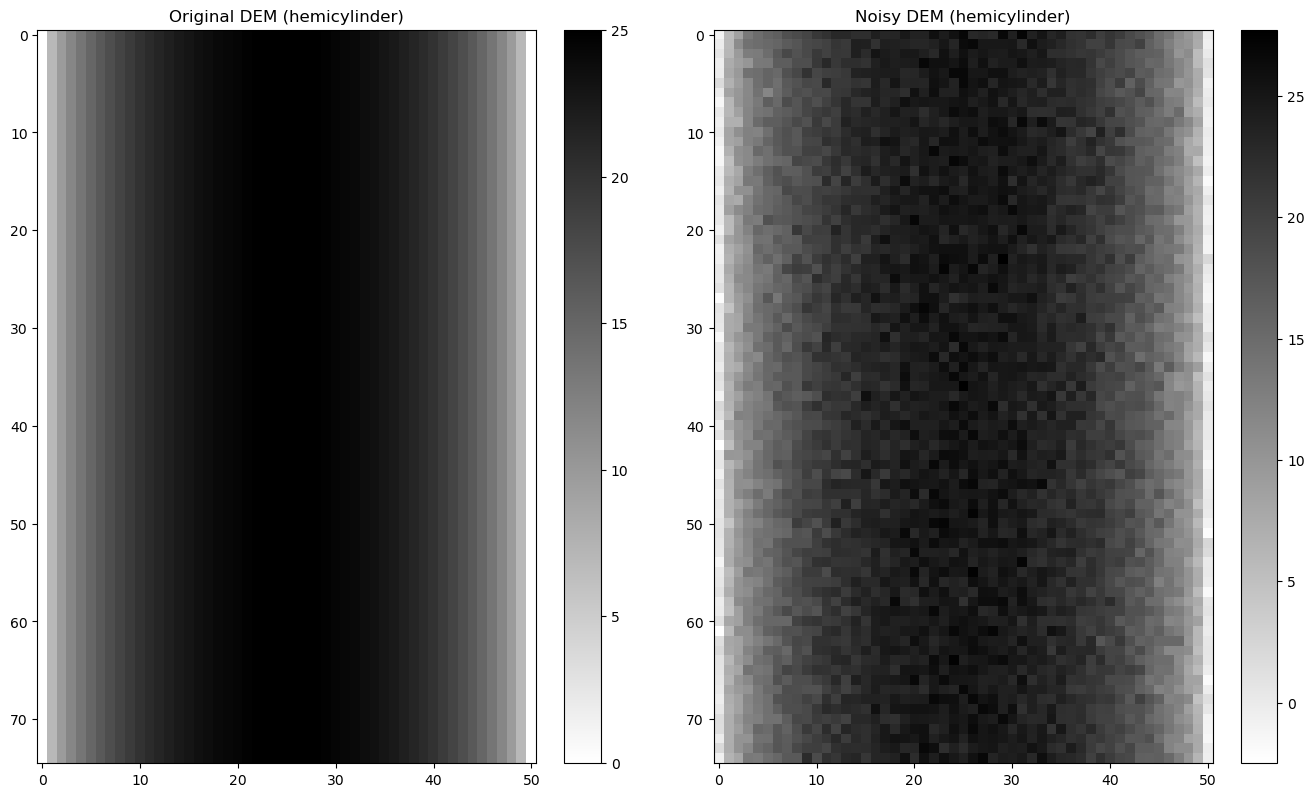

In [64]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hemicylinder)')
plt.imshow(arr_c, cmap='binary')
plt.colorbar(fraction=0.065)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hemicylinder)')
plt.imshow(arr_cn, cmap='binary')
plt.colorbar(fraction=0.065)
plt.show()

In [20]:
#Export
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemicylinder_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_c)
# gtiff.FlushCache()
gtiff = None

In [57]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 200
b1 = 100

arr_hp = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_hp.shape[0]
ncols = arr_hp.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_hp[x][y] = z
        except ValueError:
            pass

#arr_hp

In [23]:
#Export
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/paraboloid_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
gtiff.GetRasterBand(1).WriteArray(arr_hp)

gtiff = None

In [58]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_hpn = arr_hp + arr_n
#arr_hpn

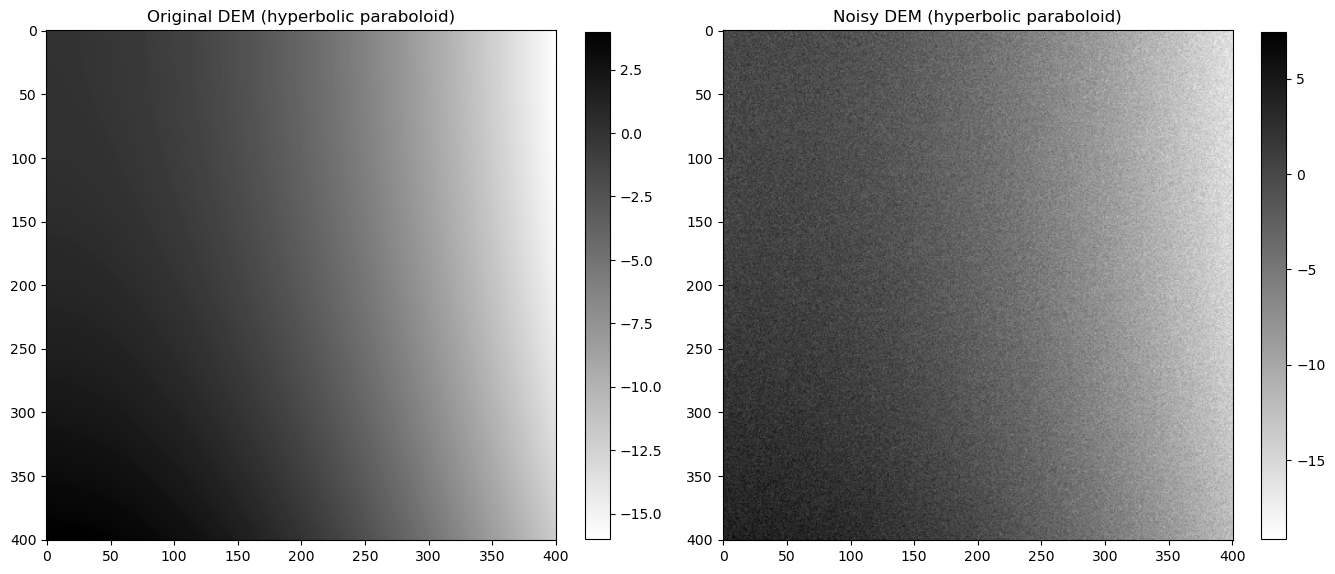

In [62]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.045)
plt.show()

In [12]:
#Export
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/noisy_paraboloid_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
gtiff.GetRasterBand(1).WriteArray(arr_hpn)

gtiff = None

In [ ]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.04)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.04)
plt.show()